In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
# #for SEMEVAL ---------------

# import pickle
# import numpy as np
# import pandas as pd
# import csv

# with open('/content/drive/MyDrive/Colab Notebooks/Semeval/baselines/semeval_literal_test_base5.pkl', mode='rb') as f:
#   litBase_test = pickle.load(f)
#   f.close()

# with open('/content/drive/MyDrive/Colab Notebooks/Semeval/baselines/semeval_literal_train_base5.pkl', mode='rb') as f:
#   litBase_train = pickle.load(f)
#   f.close()

# with open('/content/drive/MyDrive/Colab Notebooks/Semeval/baselines/semeval_metonymic_test_base5.pkl', mode='rb') as f:
#   metBase_test = pickle.load(f)
#   f.close()

# with open('/content/drive/MyDrive/Colab Notebooks/Semeval/baselines/semeval_metonymic_train_base5.pkl', mode='rb') as f:
#   metBase_train = pickle.load(f)
#   f.close()


In [ ]:
# #for CONLL ---------------

# import pickle
# import numpy as np
# import pandas as pd
# import csv

# with open('/content/drive/MyDrive/Colab Notebooks/Conll/baselines/conll_literal_test_base10.pkl', mode='rb') as f:
#   litBase_test = pickle.load(f)
#   f.close()

# with open('/content/drive/MyDrive/Colab Notebooks/Conll/baselines/conll_literal_train_base10.pkl', mode='rb') as f:
#   litBase_train = pickle.load(f)
#   f.close()

# with open('/content/drive/MyDrive/Colab Notebooks/Conll/baselines/conll_metonymic_test_base10.pkl', mode='rb') as f:
#   metBase_test = pickle.load(f)
#   f.close()

# with open('/content/drive/MyDrive/Colab Notebooks/Conll/baselines/conll_metonymic_train_base10.pkl', mode='rb') as f:
#   metBase_train = pickle.load(f)
#   f.close()

In [ ]:
# #for RELOCAR ---------------

# import pickle
# import numpy as np
# import pandas as pd
# import csv

# with open('/content/drive/MyDrive/Colab Notebooks/ReLocaR/baselines/relocar_literal_test_base50.pkl', mode='rb') as f:
#   litBase_test = pickle.load(f)
#   f.close()

# with open('/content/drive/MyDrive/Colab Notebooks/ReLocaR/baselines/relocar_literal_train_base50.pkl', mode='rb') as f:
#   litBase_train = pickle.load(f)
#   f.close()

# with open('/content/drive/MyDrive/Colab Notebooks/ReLocaR/baselines/relocar_metonymic_test_base50.pkl', mode='rb') as f:
#   metBase_test = pickle.load(f)
#   f.close()

# with open('/content/drive/MyDrive/Colab Notebooks/ReLocaR/baselines/relocar_metonymic_train_base50.pkl', mode='rb') as f:
#   metBase_train = pickle.load(f)
#   f.close()


In [ ]:
#for WIMCOR ---------------

import pickle
import numpy as np
import pandas as pd
import csv

with open('/content/drive/MyDrive/Colab Notebooks/wimcor/baseline/wimcor_test_literal_base10.pkl', mode='rb') as f:
  litBase_test = pickle.load(f)
  f.close()

with open('/content/drive/MyDrive/Colab Notebooks/wimcor/baseline/wimcor_train_literal_base10.pkl', mode='rb') as f:
  litBase_train = pickle.load(f)
  f.close()

with open('/content/drive/MyDrive/Colab Notebooks/wimcor/baseline/wimcor_test_metonymic_base10.pkl', mode='rb') as f:
  metBase_test = pickle.load(f)
  f.close()

with open('/content/drive/MyDrive/Colab Notebooks/wimcor/baseline/wimcor_train_metonymic_base10.pkl', mode='rb') as f:
  metBase_train = pickle.load(f)
  f.close()

In [ ]:
#Flatten the tuples

def organizing(l):
  flat = [i for sublist in l for item in sublist for i  in item] 

  baseList = []
  for i in range(0,len(flat),10): #change i+N for baseline!
      baseList.append([flat[i] for i in range(i,i+10)]) #change i+N for baseline!
  l = baseList

  return l

metBaseList_test = organizing(metBase_test)
metBaseList_train = organizing(metBase_train)
litBaseList_test = organizing(litBase_test)
litBaseList_train = organizing(litBase_train)


In [ ]:
# Labeling the dataset 

import pandas as pd

MetTrainLabel = [1 for i in range(len(metBaseList_train))]
MetTestLabel = [1 for i in range(len(metBaseList_test))]
litTrainLabel = [0 for i in range(len(litBaseList_train))]
litTestLabel = [0 for i in range(len(litBaseList_test))]

dict1 = {'Sentence':metBaseList_train, 'Label':MetTrainLabel}
dict2 = {'Sentence':litBaseList_train, 'Label':litTrainLabel}

df1 = pd.DataFrame(dict1)
df2 = pd.DataFrame(dict2)
frame = [df1, df2]
df_train = pd.concat(frame)

dictA = {'Sentence':metBaseList_test, 'Label':MetTestLabel}
dictB = {'Sentence':litBaseList_test, 'Label':litTestLabel}

dfa = pd.DataFrame(dictA)
dfb = pd.DataFrame(dictB)
frame1 = [dfa, dfb]
df_test = pd.concat(frame1)
print(df_test)

                                                Sentence  Label
0      [and, Overseas, Universities, include:, Intern...      1
1      [,, Hitotsubashi, University,, University, of,...      1
2      [California,, Pennsylvania, now, called, Calif...      1
3      [and, Louisville, Male, High, School, in, Loui...      1
4      [Korean, War,, B-29, Superfortresses, flew, bo...      1
...                                                  ...    ...
58547  [., He, challenged, the, legality, of, Horne's...      0
58548  [home, in, 1556., Sir, Philip, died, at, his, ...      0
58549  [and, was, buried, in, Bisham, Church, where, ...      0
58550  [May, 1918, and, led, the, Army, at, the, libe...      0
58551  [in, October, 1918, and, at, the, liberation, ...      0

[78320 rows x 2 columns]


In [ ]:
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_train = df_train.sample(frac=1).reset_index(drop=True)
print(df_test)

                                                Sentence  Label
0      [to, 1875, who, played, for, Lancashire., He, ...      0
1      [., He, started, making, soap, powder, in, the...      0
2      [,, at, a, spot, just, east, of, Big, Elk, Creek]      0
3      [and, Olazagutia, was, ready, by, 1862,, so, A...      0
4      [), where, she, discovers, a, sinister, societ...      1
...                                                  ...    ...
78315  [of, Maeda, Toshiie.,  , Having, fought, again...      1
78316  [The, Place, in, Duke's, Road,, Euston,, the, ...      0
78317  [Carolina, University, of, Illinois, at, Urban...      1
78318  [,, Lancashire,, England, by, guitarist/vocali...      0
78319  [51°10'N)"., The, Walde, Lighthouse, is, 6,  ,...      0

[78320 rows x 2 columns]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
frame = [df_train, df_test]
df_corpus = pd.concat(frame)
df_corpus
# df_corpus = df_corpus.sample(frac=1).reset_index(drop=True)
# df_train, df_test = train_test_split(df_corpus, test_size=0.5)
len(df_test)

78320

In [ ]:
text = df_corpus['Sentence'].tolist()
textTrain = df_train['Sentence'].tolist()
textTest = df_test['Sentence'].tolist()
token = Tokenizer()
token.fit_on_texts(text)

In [ ]:
vocab_size  = len(token.word_index) + 1
vocab_size

119594

In [ ]:
encoded_train = token.texts_to_sequences(textTrain)
encoded_test = token.texts_to_sequences(textTest)

In [ ]:
max_length = 24
X = pad_sequences(encoded_train, maxlen=max_length, padding='post')
y = pad_sequences(encoded_test, maxlen=max_length, padding='post')
# X = pad_sequences(encoded_train, maxlen=max_length+2, padding='pre')
# y = pad_sequences(encoded_test, maxlen=max_length+2, padding='pre')
len(X[0])

24

In [ ]:
%%time
import numpy as np

glove_vectors = dict()


# file = open('glove.twitter.27B.200d.txt', encoding='utf-8')
file = open('/content/drive/MyDrive/Colab Notebooks/GloVe 50D/glove.6B.50d.txt', encoding='utf-8')

for line in file:
    values = line.split()
    word = values[0]
    #storing the word in the variable
    vectors = np.asarray(values[1: ])
    #storing the vector representation of the respective word in the dictionary
    glove_vectors[word] = vectors
file.close()

word_vector_matrix = np.zeros((vocab_size, 50))

for word, index in token.word_index.items():
    vector = glove_vectors.get(word)
    if vector is not None:
        word_vector_matrix[index] = vector
print(word_vector_matrix.shape)  

(119594, 50)
CPU times: user 5.48 s, sys: 470 ms, total: 5.95 s
Wall time: 6.02 s


In [ ]:
X_train = X
X_test = y

y_train = df_train['Label']
y_test = df_test['Label']
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
print(X_train.shape, '\n',
X_test.shape)

(129038, 24) 
 (78320, 24)


In [ ]:
vec_size = 50

accuracies = []
precisions = []
recalls = []
f1s = []

for i in range(1): 

  model = Sequential()
  model.add(Embedding(vocab_size, vec_size, input_length=max_length, weights = [word_vector_matrix], trainable = False))
  model.add(Conv1D(64, 12, activation = 'relu'))
  model.add(MaxPooling1D(2))
  model.add(Dropout(0.5))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(16, activation='relu'))
  model.add(GlobalMaxPooling1D())
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=Adam(learning_rate = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
  classifier = model.fit(X_train, y_train, epochs =30, validation_data = (X_test, y_test))

  yhat_probs = model.predict(X_test, verbose=0)
  yhat_classes = model.predict_classes(X_test, verbose=0)
  yhat_probs = yhat_probs[:, 0]
  yhat_classes = yhat_classes[:, 0]
  
  accuracy = accuracy_score(y_test, yhat_classes)
  precision = precision_score(y_test, yhat_classes)
  recall = recall_score(y_test, yhat_classes)
  f1 = f1_score(y_test, yhat_classes)

  accuracies.append(accuracy)
  precisions.append(precision)
  recalls.append(recall)
  f1s.append(f1)

print('Training is DONE...')

Epoch 1/30
4033/4033 [==============================] - 24s 6ms/step - loss: 0.5014 - accuracy: 0.7751 - val_loss: 0.4335 - val_accuracy: 0.8165
Epoch 2/30
4033/4033 [==============================] - 23s 6ms/step - loss: 0.4171 - accuracy: 0.8241 - val_loss: 0.4159 - val_accuracy: 0.8275
Epoch 3/30
4033/4033 [==============================] - 22s 5ms/step - loss: 0.3938 - accuracy: 0.8345 - val_loss: 0.4051 - val_accuracy: 0.8335
Epoch 4/30
4033/4033 [==============================] - 23s 6ms/step - loss: 0.3843 - accuracy: 0.8394 - val_loss: 0.3993 - val_accuracy: 0.8363
Epoch 5/30
4033/4033 [==============================] - 24s 6ms/step - loss: 0.3773 - accuracy: 0.8435 - val_loss: 0.3922 - val_accuracy: 0.8390
Epoch 6/30
4033/4033 [==============================] - 22s 5ms/step - loss: 0.3635 - accuracy: 0.8503 - val_loss: 0.3912 - val_accuracy: 0.8391
Epoch 7/30
4033/4033 [==============================] - 22s 6ms/step - loss: 0.3620 - accuracy: 0.8482 - val_loss: 0.3866 - val_ac

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training is DONE...


In [ ]:
from statistics import *
# std_acc = []
# for i in range(len(accuracies)):
#   std_acc.append(i)
avgAcc = mean(accuracies)
print("The average is ", round(avgAcc,4))
arr = np.array(accuracies)
print('\nstd is: ',np.std(arr))

avgP =  mean(precisions)
print("\nThe precisions average is ", round(avgP,4))
avgR = mean(recalls)
print("\nThe recalls average is ", round(avgR,4))
avgF1 = mean(f1s)
print("\nThe f1s average is ", round(avgF1,4))

matrix = confusion_matrix(y_test, yhat_classes)
print('the matrix:\n',matrix)

The average is  0.8462

std is:  0.0

The precisions average is  0.8272

The recalls average is  0.4936

The f1s average is  0.6183
the matrix:
 [[56514  2038]
 [10010  9758]]


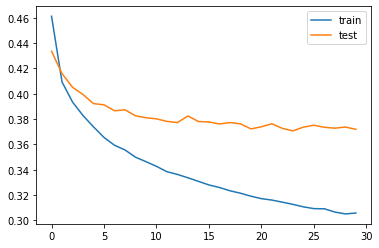

In [ ]:
import matplotlib.pyplot as plt

plt.plot(classifier.history['loss'], label='train')
plt.plot(classifier.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# _, train_acc = model.evaluate(X_train, y_train, verbose=0)
# _, test_acc = model.evaluate(X_test, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))